# Building neural network classifier with Keras

## Imports
First let's import some prerequisites

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras import backend as K

2024-01-09 11:17:22.547143: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 11:17:22.625336: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 11:17:22.625417: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 11:17:22.628954: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 11:17:22.649560: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 11:17:22.651173: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
plt.rcParams['figure.figsize'] = (10,10) # Make the figures a bit bigger

## Load training data

In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)


X_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

Let's look at some examples of the training data

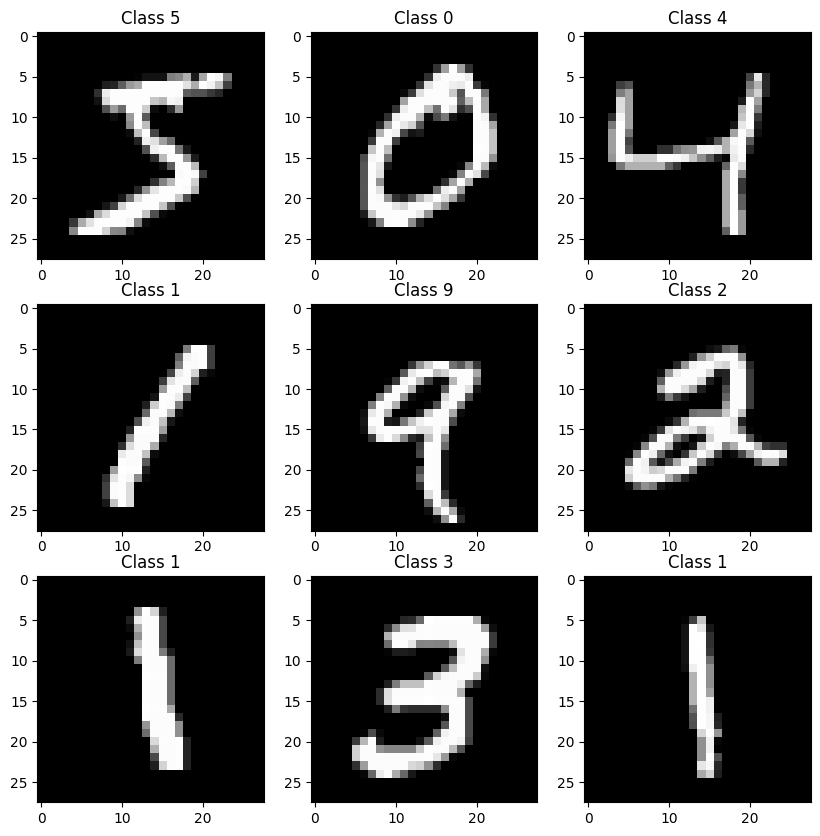

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Format the data for training

Since we are building Fully Connected network. Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [6]:
X_train1 = X_train.reshape(60000, 784)
X_test1 = X_test.reshape(10000, 784)
X_train1 = X_train1.astype('float32')
X_test1 = X_test1.astype('float32')
X_train1 /= 255
X_test1 /= 255
print("Training matrix shape", X_train1.shape)
print("Testing matrix shape", X_test1.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target matrices to be in the one-hot format, i.e.

0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]

1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.

In [7]:
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
print("Y_train shape", Y_train.shape)
print("Y_test shape", Y_test.shape)

Y_train shape (60000, 10)
Y_test shape (10000, 10)


## Build the neural network

Here we'll do a simple 3 layer fully connected (Dense) network.


In [8]:
model1 = Sequential()
model1.add(Dense(128, input_shape=(784,)))
model1.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
#model1.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model1.add(Dense(128))
model1.add(Activation('relu'))
#model1.add(Dropout(0.2))
model1.add(Dense(10))
model1.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

<img src="FCnetwork.png">

## Compile the model
When compiing a model, Keras asks you to specify your loss function and your optimizer. The loss function we'll use here is called categorical crossentropy, and is a loss function well-suited to comparing two probability distributions.

In [9]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Set hyperparameters

In [10]:
batch_size = 128
epochs = 4

## Training!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [11]:
model1.fit(X_train1, Y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(X_test1, Y_test))

Epoch 1/4
469/469 [==============================] - 10s 19ms/step - loss: 0.3233 - accuracy: 0.9075 - val_loss: 0.1544 - val_accuracy: 0.9545
Epoch 2/4
469/469 [==============================] - 8s 17ms/step - loss: 0.1253 - accuracy: 0.9634 - val_loss: 0.1075 - val_accuracy: 0.9670
Epoch 3/4
469/469 [==============================] - 8s 17ms/step - loss: 0.0868 - accuracy: 0.9736 - val_loss: 0.0986 - val_accuracy: 0.9684
Epoch 4/4
469/469 [==============================] - 9s 19ms/step - loss: 0.0654 - accuracy: 0.9798 - val_loss: 0.0923 - val_accuracy: 0.9720


In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 11828

## Evaluate its performance

In [13]:
score1 = model1.evaluate(X_test1, Y_test, verbose=1)
print('Test score:', score1[0])
print('Test accuracy:', score1[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0923 - accuracy: 0.9720
Test score: 0.09228895604610443
Test accuracy: 0.972000002861023


### Inspecting the output
It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [14]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes1 = model1.predict(X_test1, verbose=1)
predicted_classes1 = np.argmax(predicted_classes1, axis=1)
# Check which items we got right / wrong
correct_indices1 = np.nonzero(predicted_classes1 == y_test)[0]
incorrect_indices1 = np.nonzero(predicted_classes1 != y_test)[0]

313/313 [==============================] - 1s 4ms/step


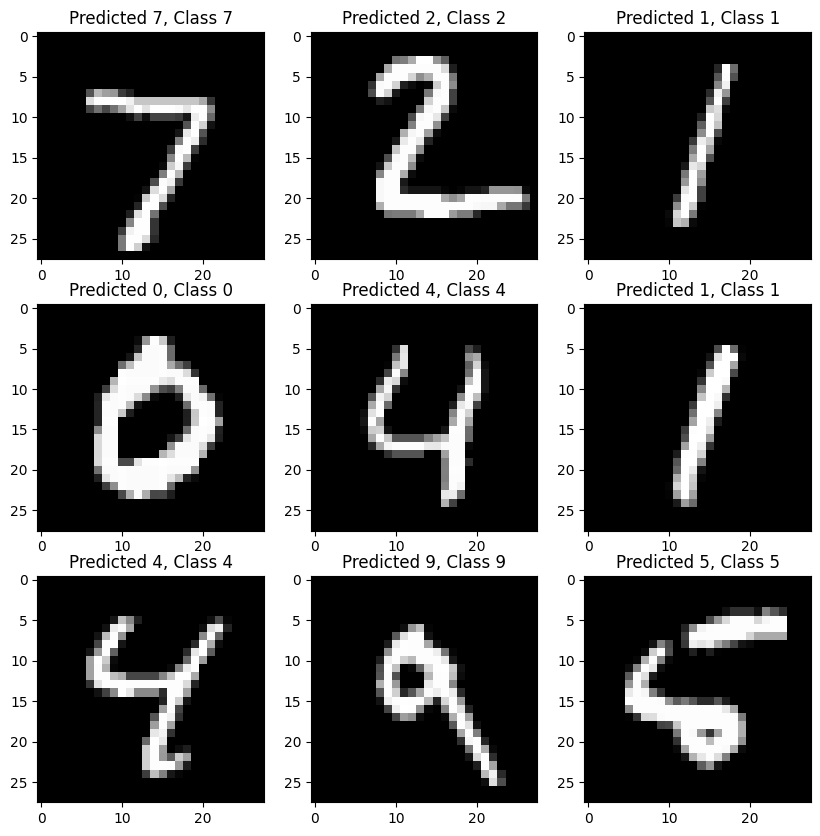

In [15]:
plt.figure()
for i, correct in enumerate(correct_indices1[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test1[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes1[correct], y_test[correct]))
    

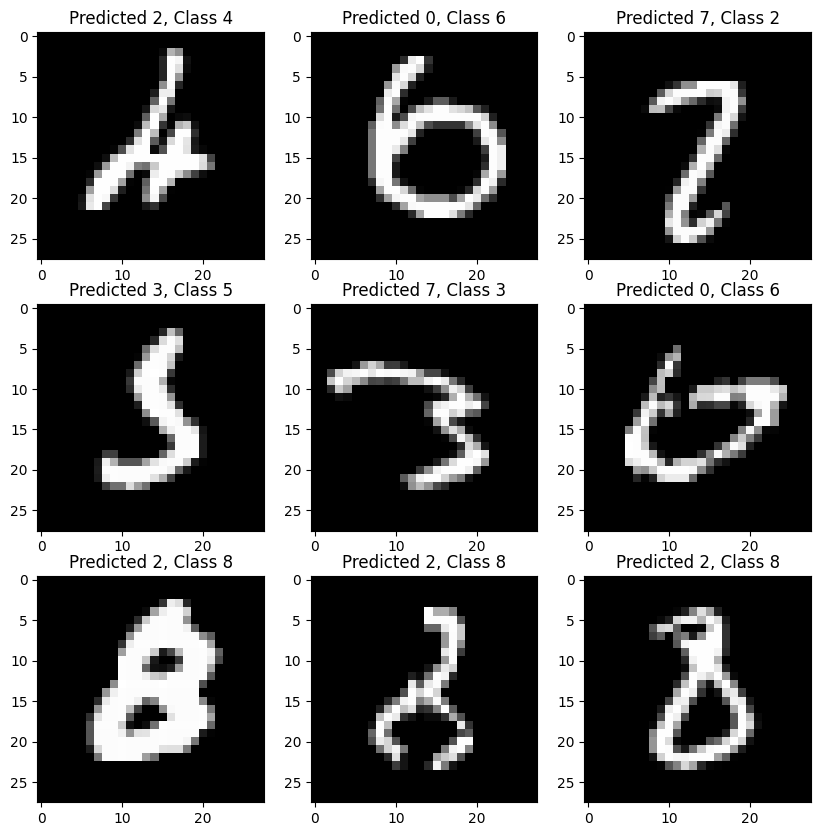

In [16]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices1[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test1[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes1[incorrect], y_test[incorrect]))

# Different approach: CNN

## Format the data for training
Now we are building Convolutional Neural Network (CNN). This type of neural-network is going to take an image for each training example, so we pass the input as 28x28 image. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [17]:
if K.image_data_format() == 'channels_first':
    X_train2 = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test2 = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train2 = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test2 = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [18]:
X_train2 = X_train2.astype('float32')
X_test2 = X_test2.astype('float32')
X_train2 /= 255
X_test2 /= 255
print('X_train shape:', X_train2.shape)
print(X_train2.shape[0], 'train samples')
print(X_test2.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Output stays the same - encoded as one-hot vectors.

In [19]:
print("Y_train shape", Y_train.shape)
print("Y_test shape", Y_test.shape)

Y_train shape (60000, 10)
Y_test shape (10000, 10)


## Building CNN
Here we'll do a Convolutional Neural Network (CNN) with 2 conv layers followed by MaxPooling.


In [20]:
model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
#model2.add(Dense(128, activation='relu'))
model2.add(Dense(nb_classes, activation='softmax'))

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                27050     
                                                                 
Total params: 27210 (106.29 KB)
Trainable params: 27210 (106.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<img src="CNNetwork.png">

### Compile CNN model

In [22]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# hyperparameters
batch_size = 128
epochs = 4

### Train CNN

In [24]:
model2.fit(X_train2, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test2, Y_test))

Epoch 1/4
469/469 [==============================] - 34s 70ms/step - loss: 0.4146 - accuracy: 0.8888 - val_loss: 0.1809 - val_accuracy: 0.9503
Epoch 2/4
469/469 [==============================] - 33s 70ms/step - loss: 0.1496 - accuracy: 0.9578 - val_loss: 0.1219 - val_accuracy: 0.9660
Epoch 3/4
469/469 [==============================] - 36s 76ms/step - loss: 0.1036 - accuracy: 0.9709 - val_loss: 0.0907 - val_accuracy: 0.9727
Epoch 4/4
469/469 [==============================] - 37s 80ms/step - loss: 0.0829 - accuracy: 0.9763 - val_loss: 0.0821 - val_accuracy: 0.9749


### Evalate CNN

In [25]:
score = model2.evaluate(X_test2, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.0821 - accuracy: 0.9749
Test loss: 0.08213520050048828
Test accuracy: 0.9749000072479248


### Inspecting the output

In [26]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes2 = model2.predict(X_test2, verbose=1)
predicted_classes2 = np.argmax(predicted_classes2, axis=1)
# Check which items we got right / wrong
correct_indices2 = np.nonzero(predicted_classes2 == y_test)[0]
incorrect_indices2 = np.nonzero(predicted_classes2 != y_test)[0]

313/313 [==============================] - 3s 10ms/step


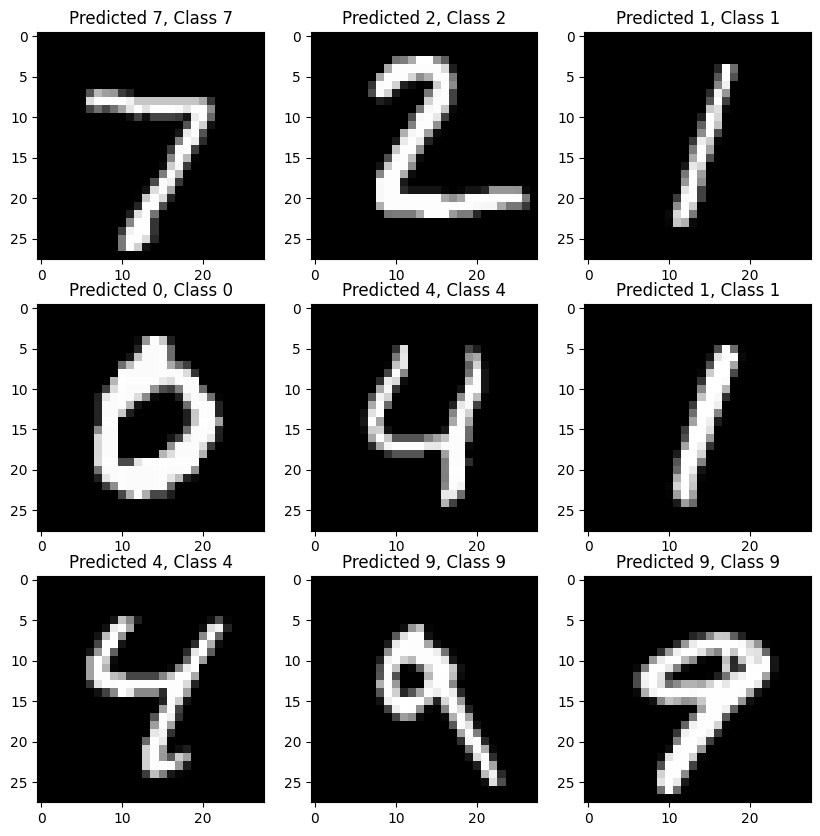

In [27]:
plt.figure()
for i, correct in enumerate(correct_indices2[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test2[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes2[correct], y_test[correct]))

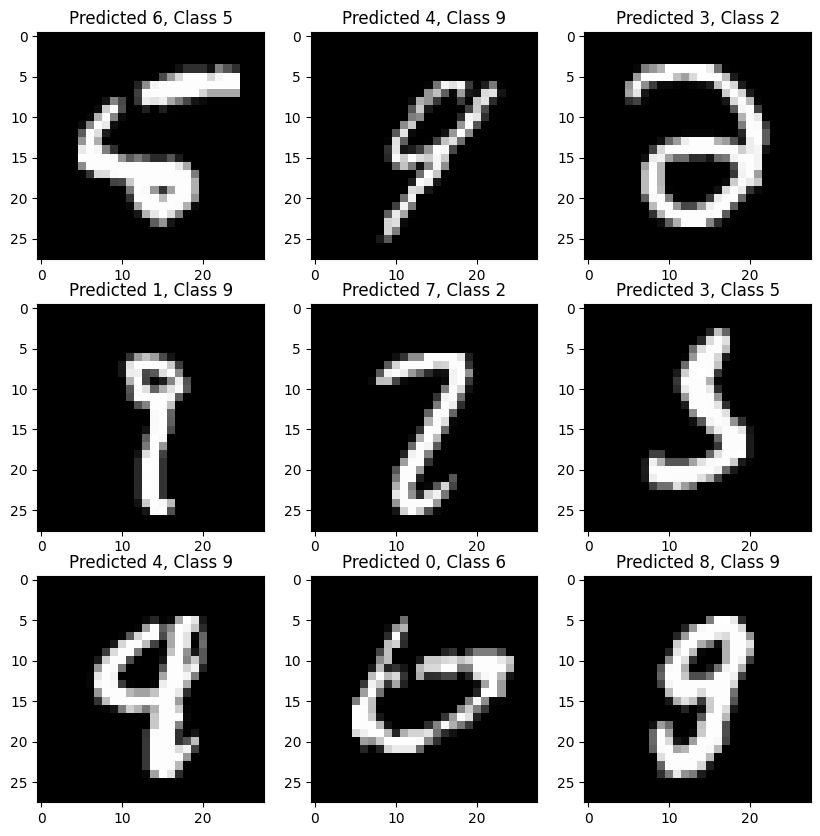

In [28]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices2[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test2[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes2[incorrect], y_test[incorrect]))

# Comparison: FC vs CNN

In [29]:
score1 = model1.evaluate(X_test1, Y_test, verbose=0)
#print('FC model Test loss:', score1[0])
print('FC model Test accuracy:', score1[1])
params1 = model1.count_params()
print('FC model # params:', str(params1))

FC model Test accuracy: 0.972000002861023
FC model # params: 118282


In [30]:
score2 = model2.evaluate(X_test2, Y_test, verbose=0)
#print('CNN model Test loss:', score2[0])
print('CNN model Test accuracy:', score2[1])
params2 = model2.count_params()
print('CNN model # params:', str(params2))

CNN model Test accuracy: 0.9749000072479248
CNN model # params: 27210


# Summary:
CNNs have better performance with fewer parameters, hence less memory and computing consumption. CNNs are able to handle image data that is infeasible using only FC layers. The number of weights in FC layer with 1000 neurons for 224x224x3 image is something like 150M. That's 150M for only one layer. While modern CNN architectures that have 50-100 layers while having overall couple dozen milion parameters, for example ResNet50 has 23M params and InceptionV3 has 21M parameters.

## TL;DR
CNNs are better for image data.